# Analiza tedenske kpop lestvice radia KBS

V tem dokumentu se nahaja analiza tedenske glasbene lestvice, ki se nahaja [na tej spletni strani](http://world.kbs.co.kr/service/musictop10.htm?lang=e). Omenjena spletna stran vsak teden objavi 10 najbolj popularnih pesmi iz zvrsti korejskega popa, zraven pa pogosto še vključi link do predstavitve izvajalca, kjer lahko najdemo podatke kot so leto debitiranja, založbe pod katere spada, kratek opis izvajalca in tudi seznam članov v primeru, ko gre za skupino, in ne za solista. Žal pa je kakšen izmed teh podatkov pogosto izpuščen, zato niso vsi vnosi popolni. Kaj takega nas pa seveda ne bo ustavilo, saj je z danimi podatki neka konkretna analiza še kar mogoča. Obravnavali bomo časovno obdobje 2015-2020.

# Tehnično ozadje

Enostavno je opaziti vzorec v URL-naslovih lestvic za posamezni teden. Napisal sem skripto, ki zgenerira vse želene URL-naslove, potem sem pa z orodji iz [profesorjevega repozitorija](https://github.com/matijapretnar/programiranje-1/blob/master/02-zajem-podatkov/predavanja/orodja.py) shranil vse strani, iz njih z uporabo regularnih izrazov in Pythonove knjižnice re izluščil želene podatke in jih spet s pomočjo profesorjevih orodij shranil v posamezne csv datoteke.

# Uvoz podatkov

Začnimo z uvozom zbranih podatkov.

In [1]:
import pandas as pd
import matplotlib
import os.path
# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# razpredelnice, s katerimi bomo delali
pesmi = pd.read_csv('obdelani-podatki/pesmi.csv')
umetniki = pd.read_csv('obdelani-podatki/umetniki.csv', index_col='sifra_umetnika')
zalozbe = pd.read_csv('obdelani-podatki/zalozbe.csv', index_col='sifra_umetnika')
clani_skupin = pd.read_csv('obdelani-podatki/clani_skupin.csv', index_col='sifra_umetnika')

pesmi

,datum,mesto,naslov,sifra_umetnika
0,2015-01-11,1,"December, 2014 (The Winter`s Tale)",352301.0
1,2015-01-11,2,LUV,343777.0
2,2015-01-11,3,울면 안 돼,343790.0
3,2015-01-11,4,UP & DOWN,235496.0
4,2015-01-11,5,At Gwanghwamun,386080.0
...,...,...,...,...
3063,2020-12-20,6,Given-Taken,395837.0
3064,2020-12-20,7,Love should not be harsh on you,393964.0
3065,2020-12-20,8,Lovesick Girls,389341.0
3066,2020-12-20,9,Shiny Star(2020),395848.0


Kot vidimo imamo v zgornji razpredelnici razvrščene posamezne pesmi po datumih, ko so nastopile na lestvici, zraven pa še podatek o mestu, ki ga je pesem takrat zasedala na lestvici, in šifra izvajalca, če so podatki o izvajalcu bili na voljo. Poglejmo koliko je takšnih manjkajočih podatkov.

In [2]:
pesmi['sifra_umetnika'].size - pesmi['sifra_umetnika'].count()

256

Vidimo, da je takih primerov izredno malo, saj je približno 92% vnosov popolnih, torej lahko brez slabe vesti ugotavljamo lastnosti in trende lestvice.

Spreten opazovalec je zagotovo zapazil, da je število vnešenih pesmi 3068, kar pa ni deljivo z 10 kot bi mi pričakovali. Poglejmo, v čem leži težava

In [3]:
pesmi.groupby('datum').size().sort_values()

datum
2017-01-29     9
2019-03-31     9
2019-01-27    10
2019-01-20    10
2019-01-13    10
              ..
2016-12-25    10
2016-12-18    10
2016-12-11    10
2017-02-05    10
2020-12-20    10
Length: 307, dtype: int64

Izgleda, da pri dveh datumih program pobere le 9 pesmi namesto 10. Ob obisku ustreznih spletnih strani vidimo, da lestvica na teh dveh datumih zaobsega le 9 pesmi, za razliko od velike večine drugih datumov, ko jih zaobsega 10. Zakaj? Bog ve.

Očitno je, da KBS-ovo spletno stran niso sprogramirali FMF-jevci, saj vsebuje 1001 nedoslednosti, zaradi katerih pride do težav pri pobiranju podatkov, kar je razvidno tudi iz števila različnih vzorcev HTML zapisa, preko katerih sem iskal podatke. V nadalje teh primerov ne bom posebno izpostavljal. Če opazite kakšno čudno lastnost obravnavanih podatkov, je najverjetneje to razlog.

# Analiza

## Prvaki

Očitno prvo vprašanje pri analizi je, katera pesem se je na lestvici pojavila največkrat in kateri umetniki so največkrat kraljevali na njej.

### Najbolj popularne pesmi

<AxesSubplot:title={'center':'Top 10 pesmi po pojavitvah'}, ylabel='(Pesem, Umetnik)'>

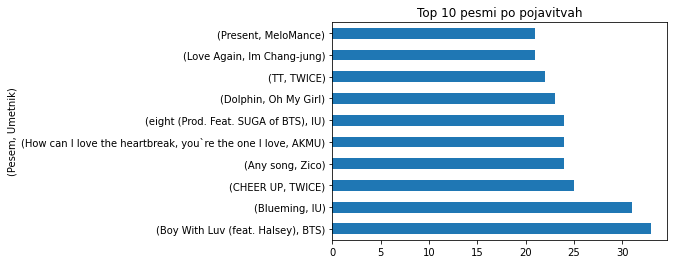

In [4]:
pesmi_z_umetniki_polno = pesmi.merge(umetniki, left_on='sifra_umetnika', right_on='sifra_umetnika')
pesmi_z_umetniki = pesmi_z_umetniki_polno[['naslov', 'ime_umetnika']]
pocisceno_za_graf = pesmi_z_umetniki.groupby(['naslov', 'ime_umetnika']).size().sort_values(ascending=False).head(10)

pocisceno_za_graf.plot.barh(title='Top 10 pesmi po pojavitvah', xlabel='(Pesem, Umetnik)')

Iz podatkov je razvidno, da je najboljša pesem [Boy With Luv](https://www.youtube.com/watch?v=XsX3ATc3FbA) izvajalca [BTS](https://en.wikipedia.org/wiki/BTS). Za vešče poznavalce kpop scene to ne bo nikakršno presenečenje, saj je ta pesem pravi mednarodni hit, ki je krepko presegel milijardo ogledov na YouTubu.

Na drugem mestu mu sledi [Blueming](https://www.youtube.com/watch?v=D1PvIWdJ8xo) priznane solistke [IU](https://en.wikipedia.org/wiki/IU_(singer)), ki je med drugim znana po popolni dominaciji lestvic, kadarkoli izide kakšna njena pesem.

Tretje mesto pa zaseda pesem [CHEER UP](https://www.youtube.com/watch?v=c7rCyll5AeY) glasbene skupine [TWICE](https://en.wikipedia.org/wiki/Twice). Tudi ta primerek ni presenetljiv, saj je TWICE glavna dekliška skupina gromozanske založbe JYP.

### Najbolj popularni umetniki

<AxesSubplot:ylabel='Umetnik'>

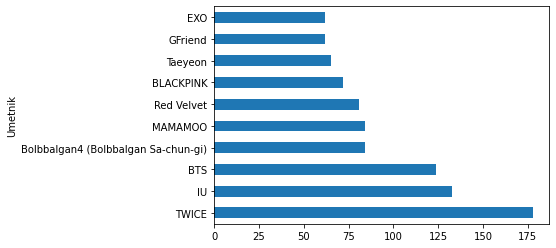

In [5]:
pesmi_z_umetniki.groupby('ime_umetnika').size().sort_values(ascending=False).head(10).plot.barh(xlabel='Umetnik')

Vrh te kategorije zasedajo že prej omenjeni TWICE, IU in BTS. To nakazuje, da ti trije umetniki niso t. i. "one-hit wonder", temveč da konsistentno ustvarjajo kvalitetno glasbo.

### Najbolj popularne založbe

<AxesSubplot:ylabel='Založba'>

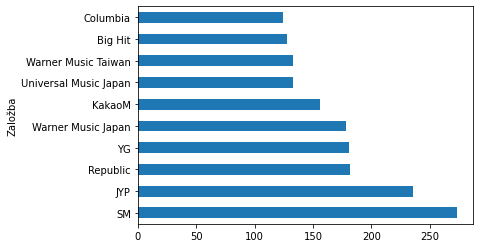

In [6]:
zalozbe.groupby('zalozba').size().sort_values(ascending=False)
pesmi_z_umetniki_in_zalozbami = pesmi_z_umetniki_polno.merge(zalozbe, left_on='sifra_umetnika', right_on='sifra_umetnika')
pesmi_z_umetniki_in_zalozbami.groupby('zalozba').size().sort_values(ascending=False).head(10).plot.barh(xlabel='Založba')

Poznavalci sveta kpopa bodo zagotovo vedeli, da v tej industriji prevladujejo 3 gromozanske glasbene založbe, ki jih po angleško poimenujemo "Big Three". Te so: SM, JYP in YG. Iz podatkov je razvidna prevlada SM in JYP, vendar kaj pa YG? Zakaj se nahaja šele na 4. mestu za znamko Republic? 

Tukaj moramo upoštevati, da umetniki lahko pripadajo večim glasbenim založbam, kjer je pa vsaka usmerjena na promoviranje glasbe v različnem svetovnem trgu. SM, JYP in YG so vse korejske založbe, ki neposredno vplivajo na razvoj kpopa in ustvarjanju ter upravljanju s kpop umetniki znotraj Južne Koreje. Ob raziskovanju založbe Republic pa odkrijemo, da se le-ta nahaja v Združenih državah Amerike, torej je ta založba najverjetneje namenjena le izvozu glasbe v ZDA in druge države Zahoda, ne ukvarja se pa neposredno z razvijanjem žanra.

Podobno velja tudi za Warner Music Japan, Universal Music Japan in Warner Music Taiwan. Naštete založbe so namenjene izvozu glasbe, dokazujejo pa tudi, da kpop ni popularen le znotraj Južne Koreje, vendar tudi na Japonskem in v Tajvanu.

## Raziskovanje lastnosti lestvice

V tem razdelku bomo pa raziskovali razne zanimive lastnosti te glasbene lestvice. Med drugim bomo analizirali pesmi glede na to, ali jih izvajajo solisti ali skupine. Pogledali si bomo kakšen tip umetnika je bolj pogost in povprečno mesto, ki ga posamezen tip umetnika zaseda na lestvici. Potem bomo bolj podrobno analiziralii starost umetnikov. Ali lestvico res zasedajo pretežno mlajši umetniki?

### Primerjava solistov in skupin

<AxesSubplot:ylabel='Delež posameznega tipa umetnika'>

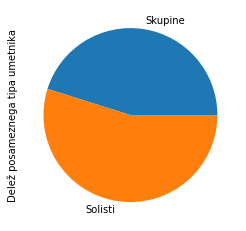

In [53]:
primerjava = pesmi_z_umetniki_polno.groupby('tip').size()
primerjava = primerjava.rename(index={'SK': 'Skupine', 'SO': 'Solisti'})
primerjava.plot.pie(ylabel='Delež posameznega tipa umetnika')

Tako kot na Zahodu, tudi na tej lestvici prevladujejo solisti, vendar pa je število skupin v kontrastu z Zahodnimi lestvicami kar znatno in le malo manjše od števila solistov. Je pa tukaj potrjeno splošno mnenje, da kpop lestvice zasedajo pretežno solisti. Kako se pa primerjata povprečno zasedeno mesto za posamezni tip umetnika?

### Povprečno mesto na lestvici

In [54]:
povprecno_mesto = pesmi_z_umetniki_polno[['mesto', 'tip']].groupby('tip').mean()
povprecno_mesto = povprecno_mesto.rename(index={'SK': 'Skupine', 'SO': 'Solisti'})
povprecno_mesto

,mesto
tip,
Skupine,5.200946
Solisti,5.693454


Čeprav je skupin manj, te v povprečju dosegajo višje mesto. Razlika je sicer majhna, vendar pa lahko iz teh podatkov sklepamo, da so pesmi skupin v splošnem rahlo bolj popularne od pesmi solistov.

### Število članov in mesto na lestvici

<AxesSubplot:xlabel='Št. članov', ylabel='Najvišje doseženo mesto'>

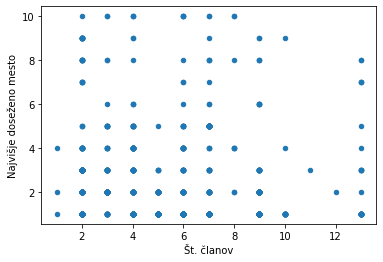

In [9]:
pesmi_skupine = pesmi_z_umetniki_polno[pesmi_z_umetniki_polno['tip'] == 'SK']
pesmi_skupine = pesmi_skupine.merge(clani_skupin, left_on='sifra_umetnika', right_on='sifra_umetnika')
pesmi_skupine = pesmi_skupine[['datum', 'ime_umetnika', 'mesto', 'naslov', 'clan']]
najvisje_zasedeno_mesto = pesmi_skupine.groupby('naslov').min('mesto')
najvisje_zasedeno_mesto = najvisje_zasedeno_mesto.rename(columns={'mesto': 'najvisje_mesto'})
pesmi_skupine = pesmi_skupine.merge(najvisje_zasedeno_mesto, left_on='naslov', right_on='naslov')
pesmi_skupine = pesmi_skupine.drop(columns='mesto')
pesmi_skupine = pesmi_skupine.groupby(['datum', 'ime_umetnika', 'naslov', 'najvisje_mesto']).count()
pesmi_skupine.reset_index()[['najvisje_mesto', 'clan']].plot.scatter(x='clan', y='najvisje_mesto', xlabel='Št. članov', ylabel='Najvišje doseženo mesto')

Kot je razvidno iz grafa, ne obstaja nobene korelacije med številom članov in največjo doseženo pozicijo na lestvici. To je bilo tudi za pričakovati, saj nas po navadi pri poslušanje glasbe ne briga, koliko ljudi je notri prisotnih. Iz teh podatkov pa lahko še razberemo, da so korejske glasbene skupine lahko po številu članov kar ogromne v primerjavi s tem, kar smo mi navajeni na Zahodu. Največja trenutno aktivna kpop skupina ima kar 23 članov.

### Starost umetnikov

Z besedno zvezo "starost umetnikov" tukaj mislimo število let, ki je minilo, odkar so umetniki debitirali, do datuma, ko je njihova pesem prišla na lestvico. Svet kpopa je pogosto krut in mnogi umetniki so uspešni le za kratek čas, mogoče le za par let preden so vrženi v pogubo. V tem oddelku bomo pogledali, če se ta fenomen odraža tudi v zbranih podatkih.

In [40]:
def izlusci_leto(datum):
    return int(datum[:4])

pesmi_z_umetniki_polno['starost'] = pesmi_z_umetniki_polno['datum'].apply(izlusci_leto) - pesmi_z_umetniki_polno['debut']
starosti = pesmi_z_umetniki_polno[['sifra_umetnika', 'starost', 'tip']].dropna().sort_values('starost')
starosti.head(10)

,sifra_umetnika,starost,tip
2746,368849.0,-1.0,SK
2018,239348.0,0.0,SK
2533,351072.0,0.0,SO
2532,351072.0,0.0,SO
2531,351072.0,0.0,SO
2491,347386.0,0.0,SO
2490,347386.0,0.0,SO
1812,239165.0,0.0,SO
1811,239165.0,0.0,SO
2119,239455.0,0.0,SO


In [38]:
starosti.tail(10)

,sifra_umetnika,starost,tip
1184,393964.0,28.0,SO
1183,393964.0,28.0,SO
1182,393964.0,28.0,SO
1188,393964.0,30.0,SO
1185,393964.0,30.0,SO
1186,393964.0,30.0,SO
1187,393964.0,30.0,SO
1191,393964.0,30.0,SO
1189,393964.0,30.0,SO
1190,393964.0,30.0,SO


<AxesSubplot:>

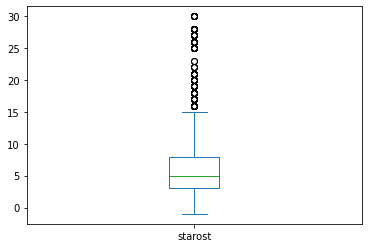

In [34]:
starosti['starost'].plot.box()

Iz zgornjih podatkov vidimo, da je kar nekaj umetnikov prišlo na lestvico že isto leto, kot so debitirali. Še bolj impresivno je, da obstaja nek čudež od glasbenika, ki je prišel na lestvico celo leto preden je sploh debitiral. Šalo na stran, ob obiskanju njegove spletne strani lahko vidimo, da je datum debitiranja nastavljen na 2020, čeprav bi v resnici moral biti 2019. Gre torej za napačen podatek s strani KBS-a.

Vidimo pa tudi, da je kar nekaj umetnikov, ki so na glasbeni sceni že kar dolgo časa. Nekateri so vstopili v svet glasbe že v prazgodovinskih 1990-ih! V nadaljevanju bomo videli, da ni naključje, da so vsi najstarejši umetniki, ki so tukaj prikazani, solisti. Splošno znanje je, da so le-ti najbolj obstojni umetniki znotraj kpopa.

Škatlasti diagram nam pa zelo nazorno pove, da je velika večina umetnikov na sceni manj kot 10 let. 

Poglejmo si še par povprečij.

In [46]:
starosti['starost'].mean()

6.580657206870799

In [55]:
starosti_po_tipu = starosti.groupby('tip').mean()['starost']
starosti_po_tipu.rename(index={'SK': 'Skupine', 'SO': 'Solisti'})

tip
Skupine    4.440504
Solisti    8.508162
Name: starost, dtype: float64

Vidimo, da je povprečna starost približno 6,6. To sicer ni pretirano zanimivo, dokler se ne poglobimo v primerjavo med solisti in skupinami. Iz podatkov je razvidna gromozanska razlika med povprečno starostjo skupin in solistov. Slednji so namreč v povprečju skoraj dvakrat starejši. 

Te opazke so pa skladne z intuitivnimi opazkami med oboževalci kpopa. Očitno je za skupine značilen bolj hiter vzpon popularnosti in prav tako hiter zaton, medtem ko pa je solistom omogočena bolj dolgotrajna kariera.

# Zaključek

S tem pa končujemo našo analizo. Upam, da je bralec dobil poglobljen vpogled v svet korejskega popa, se marsikaj novega naučil in morda le tudi dobil motivacijo za samostojno raziskovanje tega žanra. Kpop namreč ni le žanr, ampak tudi fascinanten sociološki pojav, ki počasi zavzema svet.